## Fundamentals of Data Science 
<div>
This assignment is divided into three parts:


• Part 4: Multiclass Classification and Regularization - You will extend logistic regression 
to handle multiple classes and apply regularization techniques to enhance model 
generalization. 


• Part 5: Support Vector Machines - You will explore kernel methods and 
hyperparameter tuning to classify data effectively.


• Part 6: Backpropagation and Bias-Variance Tradeoff - You will manually implement 
backpropagation in neural networks and analyze the tradeoff between model 
complexity and generalization.


Through these tasks, you will gain practical experience with modern machine learning 
techniques and improve your ability to evaluate and refine models. 
</div>


## Install and Import Libraries

In [13]:
# Import the importlib module to check if the required libraries are installed
import importlib.util

# List of required libraries
required_libraries = ['pandas', 'numpy', 'matplotlib', 'seaborn','sklearn','tensorflow']

# Install the required libraries if they are not already installed
for lib in required_libraries:
    if importlib.util.find_spec(lib) is None:
        'pip install scikit-learn'

# Import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow

## Part 0: Initial Data Exploration

### Task 1: Load and Preview the Data

In [24]:
df  = pd.read_csv(r'D:\uni\Dats Sience\CA\CA2\youtube-new\CAvideos.csv')
print(df.head())
print(df.tail())

      video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady

### Task 2: Dataset Summary

In [25]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  is

### Task 3:  Identify Missing and Duplicate Data

In [ ]:

print('null values for category_id is :%i'%df['category_id'].isnull().sum())
print('null values for channel_title is :%i'%df['channel_title'].isnull().sum())
print('null values for comment_count is :%i'%df['comment_count'].isnull().sum())
print('null values for comment_disabled is :%i'%df['comments_disabled'].isnull().sum())
print('null values for dislikes is :%i'%df['dislikes'].isnull().sum())
print('null values for is_trending is :%i'%df['is_trending'].isnull().sum())
print('null values for likes is :%i'%df['likes'].isnull().sum())
print('null values for publish_time is :%i'%df['publish_time'].isnull().sum())
print('null values for ratings_disabled is :%i'%df['ratings_disabled'].isnull().sum())
print('null values for tags is :%i'%df['tags'].isnull().sum())
print('null values for thumbnail_link is :%i'%df['thumbnail_link'].isnull().sum())
print('null values for title is :%i'%df['title'].isnull().sum())
print('null values for trending_date is :%i'%df['trending_date'].isnull().sum())
print('null values for video_error_or_removed is :%i'%df['video_error_or_removed'].isnull().sum())
print('null values for channel_title is :%i'%df['channel_title'].isnull().sum())
print('null values for video_id is :%i'%df['video_id'].isnull().sum())
print('null values for views is :%i'%df['views'].isnull().sum())

duplicate = df['video_id'].duplicated().sum()
print('number of duplicate is : %i'%duplicate)
if duplicate ==0 :
    pass
else :
    df['video_id'].drop_duplicates()
    print('number of duplicate is : 0')
    


null values for category_id is :0
null values for channel_title is :0
null values for comment_count is :0
null values for comment_disabled is :0
null values for dislikes is :0
null values for is_trending is :0
null values for likes is :0
null values for publish_time is :0
null values for ratings_disabled is :0
null values for tags is :0
null values for thumbnail_link is :0
null values for title is :0
null values for trending_date is :0
null values for video_error_or_removed is :0
null values for channel_title is :0
null values for video_id is :0
null values for views is :0
number of duplicate is : 16777
number of duplicate is : 0


### Task 4:  Distribution of Key Variables


category_id
24    13451
25     4159
22     4105
23     3773
10     3731
17     2787
1      2060
26     2007
20     1344
28     1155
27      991
19      392
15      369
2       353
43      124
29       74
30        6
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21932\1223936570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category_id', data=df, palette='viridis')


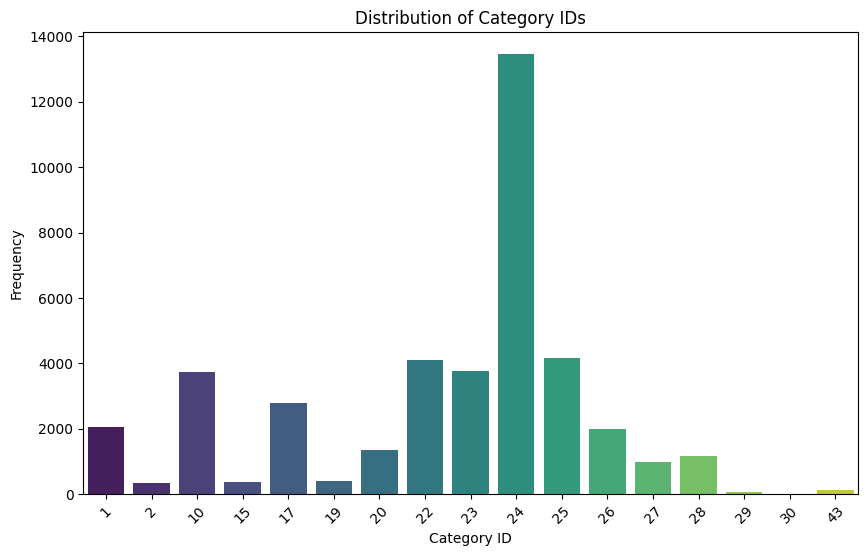

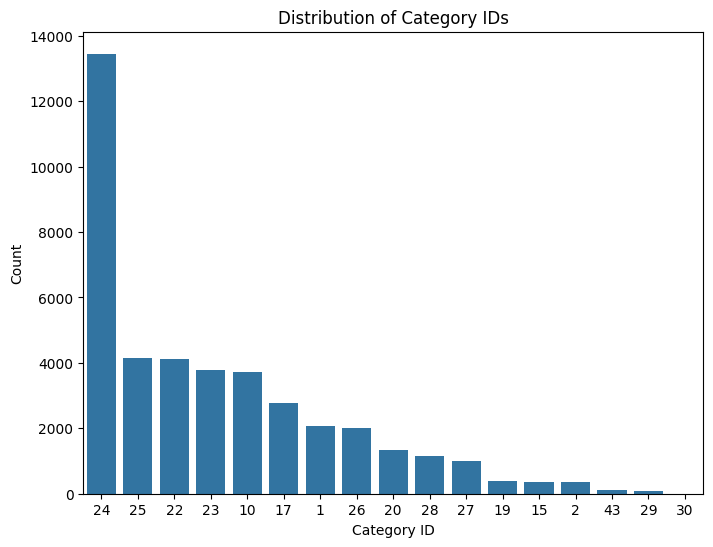

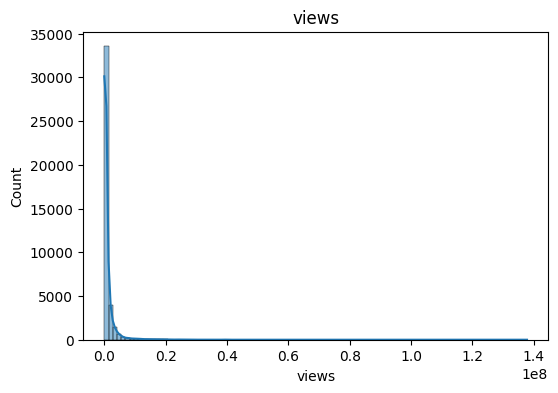

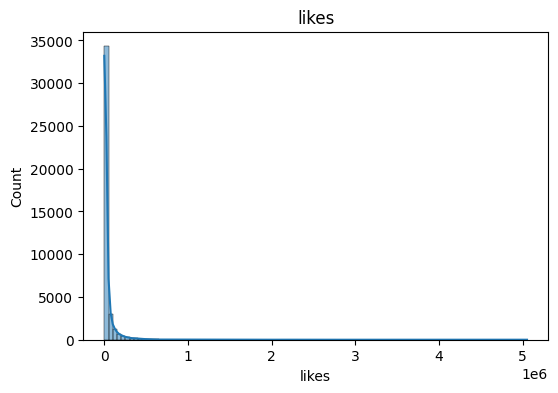

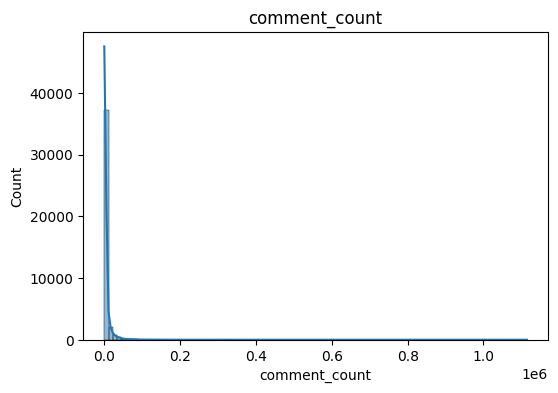

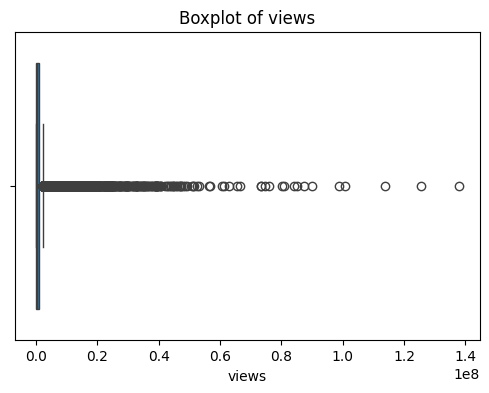

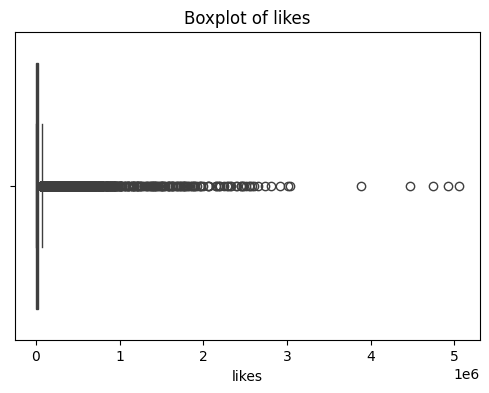

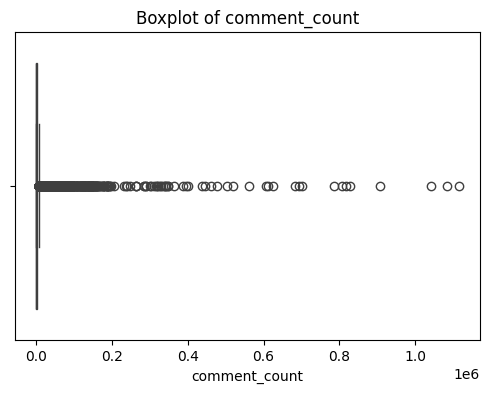

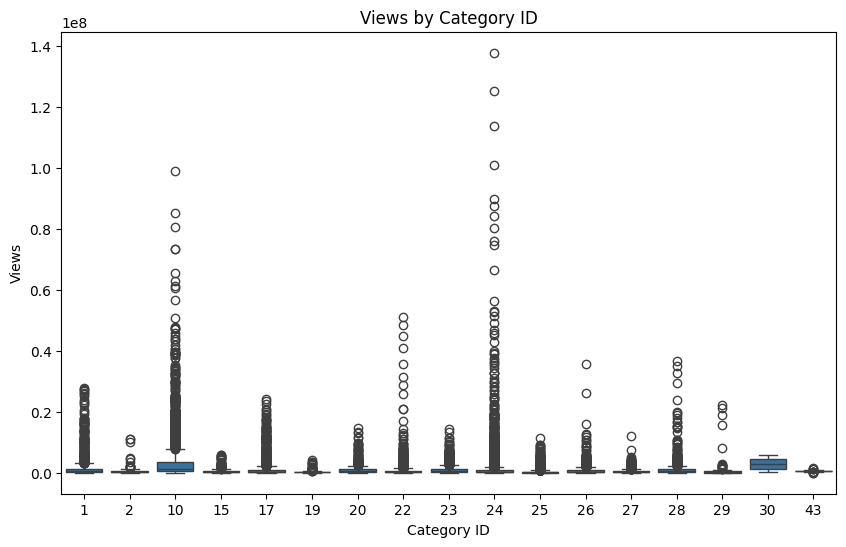

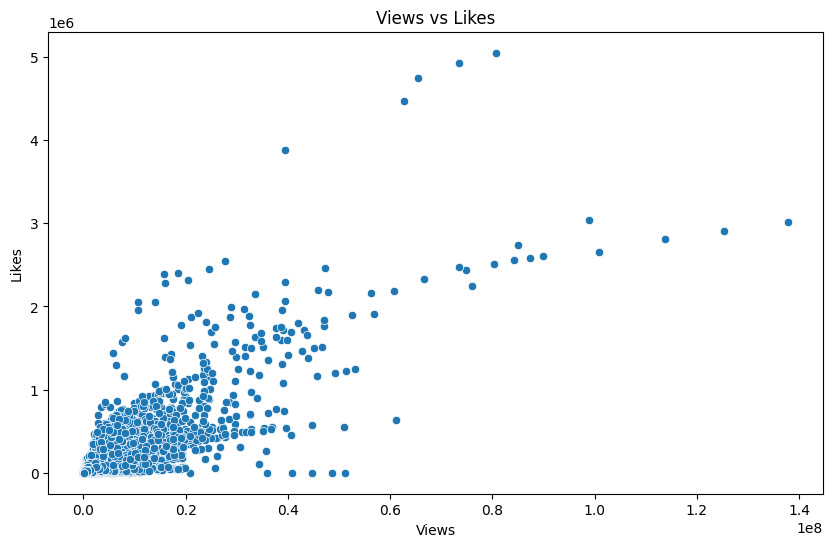

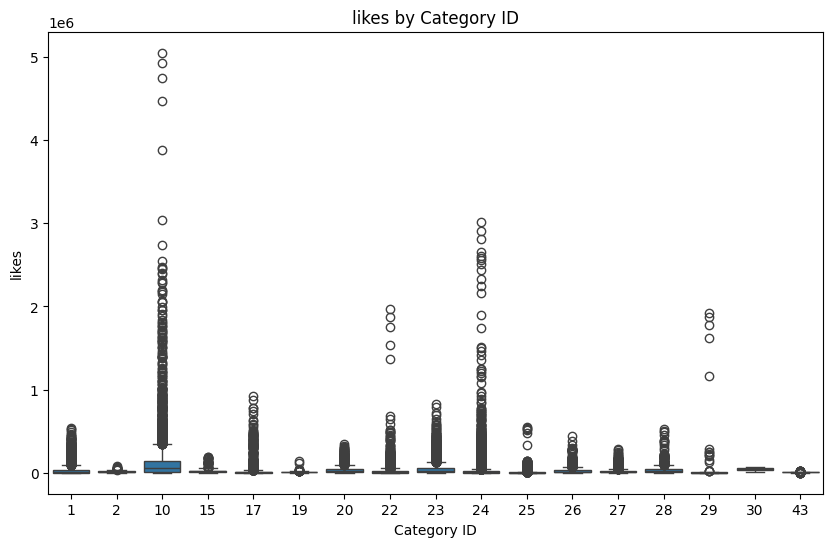

In [ ]:
print(df['category_id'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='category_id', data=df, palette='viridis')
plt.title('Distribution of Category IDs')
plt.xlabel('Category ID')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='category_id', data=df, order=df['category_id'].value_counts().index)
plt.title("Distribution of Category IDs")
plt.xlabel("Category ID")
plt.ylabel("Count")
plt.show()

numerical_features = ['views', 'likes', 'comment_count']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=100)
    plt.title(feature)
    plt.show()

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='category_id', y='views', data=df)
plt.title("Views by Category ID")
plt.xlabel("Category ID")
plt.ylabel("Views")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='views', y='likes', data=df)
plt.title("Views vs Likes")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='category_id', y='likes', data=df)
plt.title("likes by Category ID")
plt.xlabel("Category ID")
plt.ylabel("likes")
plt.show()


## Part 1:  Logistic Regression

### Task 1: Data Preparation for Classification

In [ ]:
df['engagement_rate'] = (df['likes'] + df['dislikes'] + df['comment_count']) / (df['views'] )

features = ['likes','dislikes','comment_count']
target = 'is_trending' 

scaler = MinMaxScaler() 
df[features] = scaler.fit_transform(df[features])
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Task 2: Implement Logistic Regression with Gradient Descent

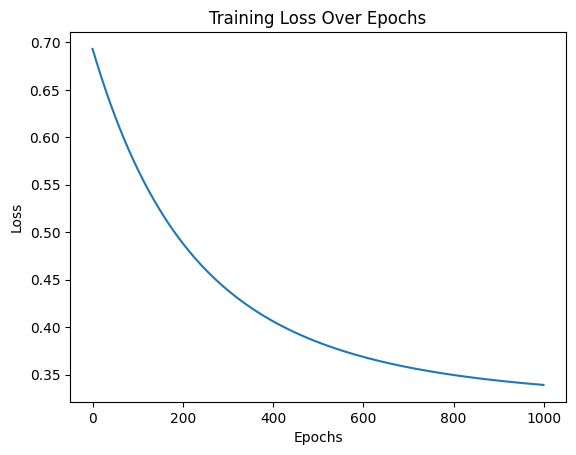

Accuracy of manual logistic regression: 0.8959276018099548


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    m = y.shape[0]
    return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m

def gradient_descent(X, y, weights, bias, learning_rate, epochs):
    m = X.shape[0]
    loss_history = []
    for epoch in range(epochs):
        
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)
        dw = np.dot(X.T, (y_pred - y)) / m
        db = np.sum(y_pred - y) / m

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias, loss_history

weights = np.zeros(X_train.shape[1])
bias = 0
learning_rate = 0.01
epochs = 1000
weights, bias, loss_history = gradient_descent(X_train.values, y_train.values, weights, bias, learning_rate, epochs)

plt.plot(range(epochs), loss_history)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    return sigmoid(linear_model) >= 0.5

manual_predictions = predict(X_test.values, weights, bias)
accuracy = np.mean(manual_predictions == y_test.values)
print(f"Accuracy of manual logistic regression: {accuracy}")




### Task 3: Compare with a Library Implementation

Accuracy of manual logistic regression: 0.8959276018099548
Accuracy of scikit-learn logistic regression: 0.9190412131588602


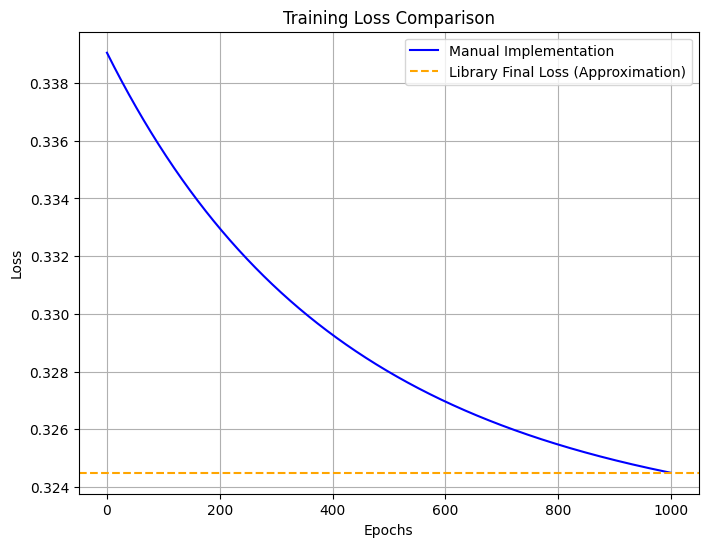

Library Implementation Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7326
           1       0.99      0.22      0.36       851

    accuracy                           0.92      8177
   macro avg       0.96      0.61      0.66      8177
weighted avg       0.93      0.92      0.90      8177



In [ ]:
from sklearn.metrics import classification_report, accuracy_score

weights, bias, loss_history = gradient_descent(X_train.values, y_train.values, weights, bias, learning_rate, epochs)
manual_predictions = predict(X_test.values, weights, bias)
manual_accuracy = np.mean(manual_predictions == y_test.values)
print(f"Accuracy of manual logistic regression: {manual_accuracy}")

library_model = LogisticRegression()
library_model.fit(X_train, y_train)
library_predictions = library_model.predict(X_test)
library_accuracy = accuracy_score(y_test, library_predictions)
print(f"Accuracy of scikit-learn logistic regression: {library_accuracy}")

plt.figure(figsize=(8, 6))
plt.plot(range(epochs), loss_history, label='Manual Implementation', color='blue')
plt.axhline(y=loss_history[-1], color='orange', linestyle='--', label='Library Final Loss (Approximation)')
plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

print("Library Implementation Report:")
print(classification_report(y_test, library_predictions))



### Task 4: Evaluate Model Performance

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix

manual_precision = precision_score(y_test, manual_predictions)
manual_recall = recall_score(y_test, manual_predictions)
manual_f1 = f1_score(y_test, manual_predictions)
library_precision = precision_score(y_test, library_predictions)
library_recall = recall_score(y_test, library_predictions)
library_f1 = f1_score(y_test, library_predictions)

print("Manual Implementation Metrics:")
print(f"Accuracy: {manual_accuracy}")
print(f"Precision: {manual_precision}")
print(f"Recall: {manual_recall}")
print(f"F1-Score: {manual_f1}")

print("Library Implementation Metrics:")
print(f"Accuracy: {library_accuracy}")
print(f"Precision: {library_precision}")
print(f"Recall: {library_recall}")
print(f"F1-Score: {library_f1}")

print("Manual Model Classification Report:")
print(classification_report(y_test, manual_predictions))

print("Library Model Classification Report:")
print(classification_report(y_test, library_predictions))



Manual Implementation Metrics:
Accuracy: 0.8959276018099548
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Library Implementation Metrics:
Accuracy: 0.9190412131588602
Precision: 0.9947643979057592
Recall: 0.22326674500587543
F1-Score: 0.3646833013435701
Manual Model Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      7326
           1       0.00      0.00      0.00       851

    accuracy                           0.90      8177
   macro avg       0.45      0.50      0.47      8177
weighted avg       0.80      0.90      0.85      8177

Library Model Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7326
           1       0.99      0.22      0.36       851

    accuracy                           0.92      8177
   macro avg       0.96      0.61      0.66      8177
weighted avg       0.93      0.92      0.90      8177



C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py

### Task 5: Visualize Model Results

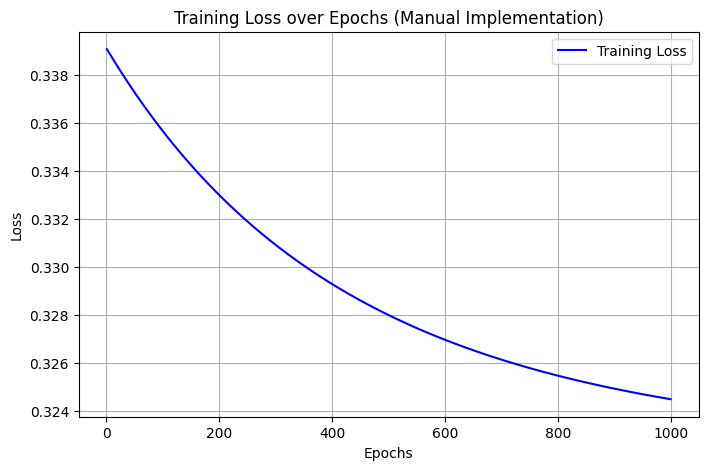

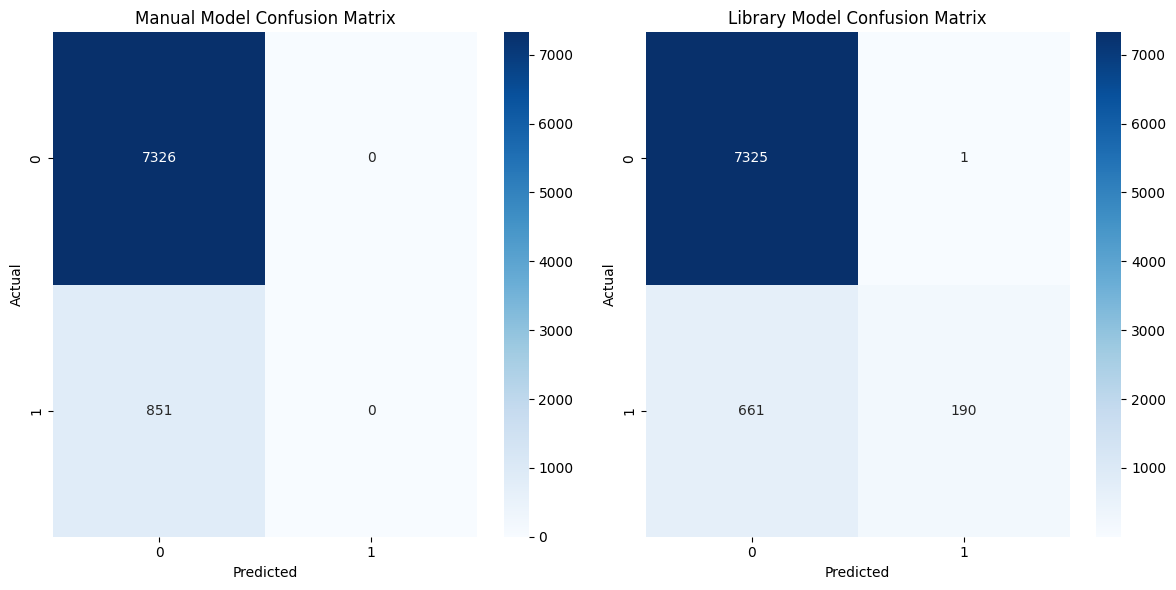

In [ ]:

plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), loss_history, label='Training Loss', color='blue')
plt.title('Training Loss over Epochs (Manual Implementation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

manual_conf_matrix = confusion_matrix(y_test, manual_predictions)
library_conf_matrix = confusion_matrix(y_test, library_predictions)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(manual_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Manual Model Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(library_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title("Library Model Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()



## Part 2:  Neural Networks & Activation Functions

### Task 1:  Build a Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping


def create_model(activation_function):
    model = Sequential([
        Dense(4, input_dim=X_train.shape[1], activation=activation_function),  
        Dense(1, activation='sigmoid')  
    ])
    model.compile(optimizer=Adam(learning_rate=0.01),
                  loss=BinaryCrossentropy(),
                  metrics=['accuracy'])
    return model

model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

### Task 2:  Experiment with Activation Functions

In [ ]:
activation_functions = ['relu', 'sigmoid', 'tanh']
history_dict = {}

for activation in activation_functions:
    print(f"\nآموزش مدل با تابع فعال‌سازی {activation}...")
    model = create_model(activation)
    history = model.fit(X_train, y_train, 
                        validation_data=(X_test, y_test), 
                        epochs=50, 
                        batch_size=32, 
                        callbacks=[early_stopping], 
                        verbose=1)
    history_dict[activation] = history.history



آموزش مدل با تابع فعال‌سازی relu...
Epoch 1/50


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9130 - loss: 0.3031 - val_accuracy: 0.9407 - val_loss: 0.1725
Epoch 2/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - accuracy: 0.9442 - loss: 0.1676 - val_accuracy: 0.9418 - val_loss: 0.1700
Epoch 3/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9466 - loss: 0.1588 - val_accuracy: 0.9433 - val_loss: 0.1683
Epoch 4/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9479 - loss: 0.1585 - val_accuracy: 0.9420 - val_loss: 0.1664
Epoch 5/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9461 - loss: 0.1592 - val_accuracy: 0.9430 - val_loss: 0.1656
Epoch 6/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9475 - loss: 0.1571 - val_accuracy: 0.9441 - val_loss: 0.1656
Epoch 7/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9464 - loss: 0.1576 - val_accuracy: 0.9436 - val_loss: 0.1652
Epoch 8/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9483 - loss: 0.1587 - val_accur

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9016 - loss: 0.3134 - val_accuracy: 0.9036 - val_loss: 0.2626
Epoch 2/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 0.9193 - loss: 0.2252 - val_accuracy: 0.9327 - val_loss: 0.1919
Epoch 3/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9400 - loss: 0.1763 - val_accuracy: 0.9408 - val_loss: 0.1754
Epoch 4/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9436 - loss: 0.1671 - val_accuracy: 0.9404 - val_loss: 0.1703
Epoch 5/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9463 - loss: 0.1598 - val_accuracy: 0.9408 - val_loss: 0.1683
Epoch 6/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9448 - loss: 0.1599 - val_accuracy: 0.9418 - val_loss: 0.1669
Epoch 7/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step - accuracy: 0.9460 - loss: 0.1588 - val_accuracy: 0.9413 - val_loss: 0.1650
Epoch 8/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9445 - loss: 0.1599 - val_ac

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9076 - loss: 0.2938 - val_accuracy: 0.9404 - val_loss: 0.1759
Epoch 2/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9436 - loss: 0.1690 - val_accuracy: 0.9425 - val_loss: 0.1684
Epoch 3/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9472 - loss: 0.1580 - val_accuracy: 0.9401 - val_loss: 0.1722
Epoch 4/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9463 - loss: 0.1603 - val_accuracy: 0.9431 - val_loss: 0.1650
Epoch 5/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9468 - loss: 0.1579 - val_accuracy: 0.9433 - val_loss: 0.1647
Epoch 6/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9469 - loss: 0.1593 - val_accuracy: 0.9437 - val_loss: 0.1682
Epoch 7/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9481 - loss: 0.1536 - val_accuracy: 0.9439 - val_loss: 0.1634
Epoch 8/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9492 - loss: 0.1525 - val_accurac

### Task 3: Evaluate and Compare

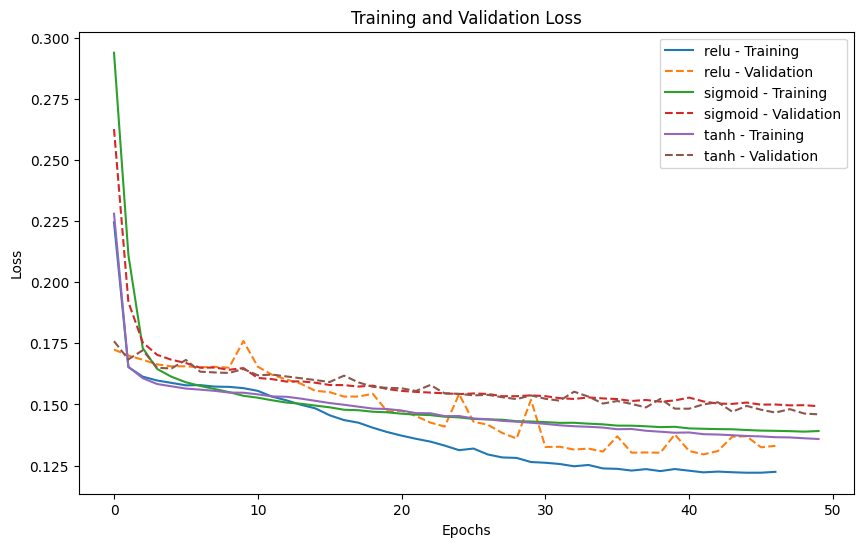

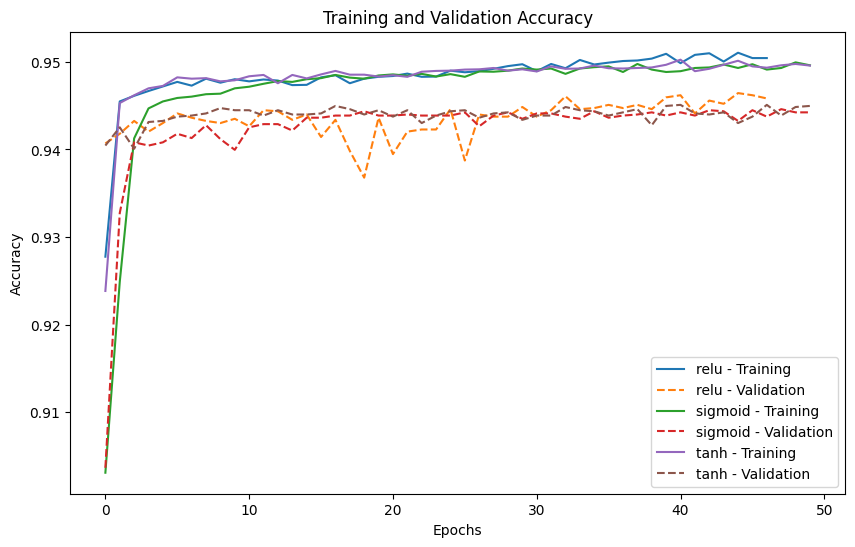

In [ ]:
def plot_metrics(history_dict, metric, title):
    plt.figure(figsize=(10, 6))
    for activation, history in history_dict.items():
        plt.plot(history[metric], label=f'{activation} - Training')
        plt.plot(history[f'val_{metric}'], label=f'{activation} - Validation', linestyle='dashed')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

plot_metrics(history_dict, 'loss', 'Training and Validation Loss')
plot_metrics(history_dict, 'accuracy', 'Training and Validation Accuracy')

## Part 4: Multiclass Classification and Regularization

### Task 1: Implement Multiclass Classification

In [ ]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
target = 'category_id'
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
ovr_model = OneVsRestClassifier(logistic_regression)
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)

ovo_model = OneVsOneClassifier(logistic_regression)
ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy_ovr, precision_ovr, recall_ovr, f1_ovr = evaluate_model(y_test, y_pred_ovr)
accuracy_ovo, precision_ovo, recall_ovo, f1_ovo = evaluate_model(y_test, y_pred_ovo)

print("One-vs-Rest (OvR) Model Performance:")
print(f"Accuracy: {accuracy_ovr:.4f}")
print(f"Precision: {precision_ovr:.4f}")
print(f"Recall: {recall_ovr:.4f}")
print(f"F1 Score: {f1_ovr:.4f}")

print("\nOne-vs-One (OvO) Model Performance:")
print(f"Accuracy: {accuracy_ovo:.4f}")
print(f"Precision: {precision_ovo:.4f}")
print(f"Recall: {recall_ovo:.4f}")
print(f"F1 Score: {f1_ovo:.4f}")


One-vs-Rest (OvR) Model Performance:
Accuracy: 0.3350
Precision: 0.1488
Recall: 0.3350
F1 Score: 0.1842

One-vs-One (OvO) Model Performance:
Accuracy: 0.3353
Precision: 0.1870
Recall: 0.3353
F1 Score: 0.1883


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Task 2: Explore Regularization

Training models with L1 regularization...


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: C

Training models with L2 regularization...


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: C

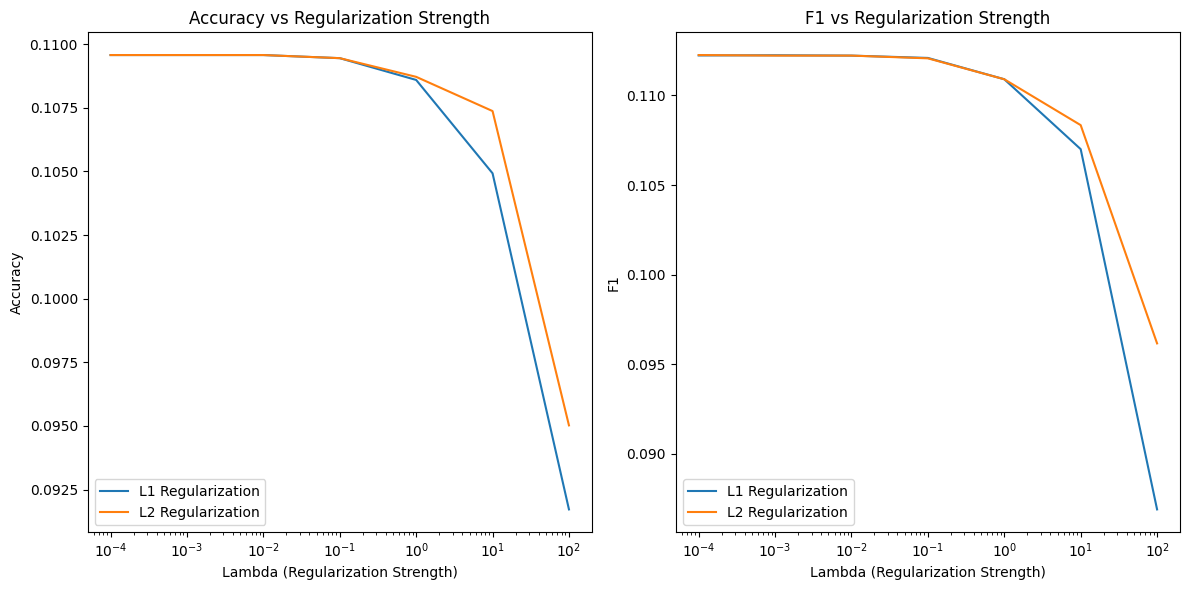

In [ ]:
from sklearn.preprocessing import StandardScaler

lambda_values = np.logspace(-4, 2, 7)  
results = {'l1': {'accuracy': [], 'f1': []}, 'l2': {'accuracy': [], 'f1': []}}
max_iter = 500  

for penalty in ['l1', 'l2']:
    print(f"Training models with {penalty.upper()} regularization...")
    for C in lambda_values:
        try:
            
            model = LogisticRegression(
                penalty=penalty,
                solver='saga',
                max_iter=max_iter,
                warm_start=True,  
                class_weight='balanced',
                C=1/C
            )

            
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
            results[penalty]['accuracy'].append(accuracy)
            results[penalty]['f1'].append(f1)

        except Exception as e:
            print(f"Error with penalty {penalty} and C={C}: {e}")
            results[penalty]['accuracy'].append(np.nan)
            results[penalty]['f1'].append(np.nan)


plt.figure(figsize=(12, 6))
for i, metric in enumerate(['accuracy', 'f1']):
    plt.subplot(1, 2, i + 1)
    for penalty in ['l1', 'l2']:
        plt.plot(lambda_values, results[penalty][metric], label=f'{penalty.upper()} Regularization')
    plt.xscale('log')
    plt.xlabel('Lambda (Regularization Strength)')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} vs Regularization Strength')
    plt.legend()
plt.tight_layout()
plt.show()

### Task 3: Visualize Results

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Figure size 1000x500 with 0 Axes>

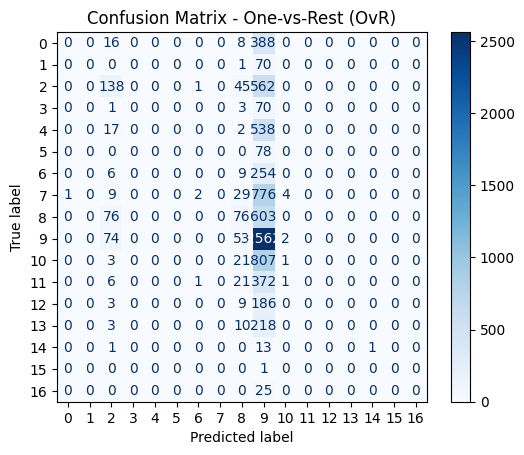

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: C

<Figure size 1000x500 with 0 Axes>

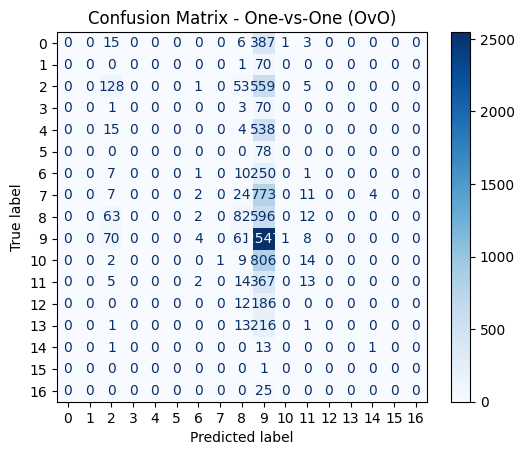

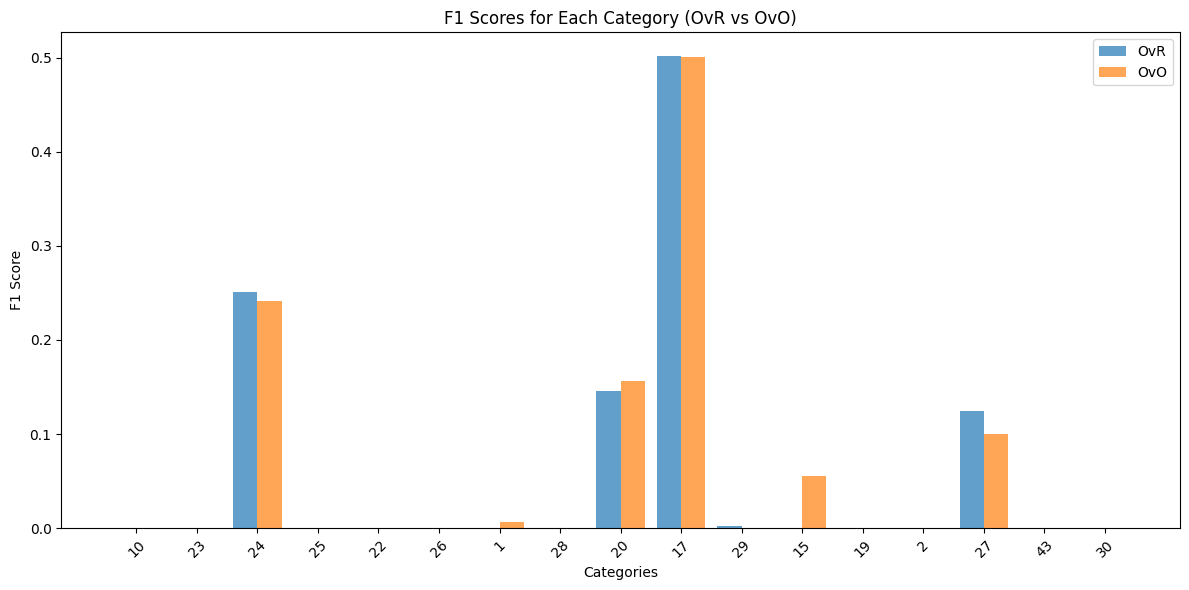

In [ ]:
from sklearn.metrics import  ConfusionMatrixDisplay

ovr_model = LogisticRegression(max_iter=100, solver='saga', multi_class='ovr')
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)
conf_matrix_ovr = confusion_matrix(y_test, y_pred_ovr)

plt.figure(figsize=(10, 5))
ConfusionMatrixDisplay(conf_matrix_ovr).plot(cmap='Blues')
plt.title("Confusion Matrix - One-vs-Rest (OvR)")
plt.show()

ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=100, solver='saga'))
ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)
conf_matrix_ovo = confusion_matrix(y_test, y_pred_ovo)

plt.figure(figsize=(10, 5))
ConfusionMatrixDisplay(conf_matrix_ovo).plot(cmap='Blues')
plt.title("Confusion Matrix - One-vs-One (OvO)")
plt.show()

f1_scores_ovr = f1_score(y_test, y_pred_ovr, average=None)
f1_scores_ovo = f1_score(y_test, y_pred_ovo, average=None)
categories = df['category_id'].unique()

plt.figure(figsize=(12, 6))
bar_width = 0.4
x_indices = np.arange(len(categories))

plt.bar(x_indices, f1_scores_ovr, width=bar_width, label='OvR', alpha=0.7)
plt.bar(x_indices + bar_width, f1_scores_ovo, width=bar_width, label='OvO', alpha=0.7)

plt.xlabel('Categories')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Each Category (OvR vs OvO)')
plt.xticks(x_indices + bar_width / 2, categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Part 5: Support Vector Machines (SVMs)

### Task 1: Train SVM Models


In [ ]:
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf']
models = {}
for kernel in kernels:
    print(f"Training SVM with {kernel} kernel...")
    svc = SVC(kernel=kernel, random_state=42)
    svc.fit(X_train, y_train)
    models[kernel] = svc


Dataset preprocessed successfully!
Training SVM with linear kernel...
Training SVM with poly kernel...
Training SVM with rbf kernel...
SVM models trained successfully!


### Task 2: Compare Kernel Performance

Kernel Performance Comparison:
   Kernel  Accuracy  Precision  Recall  F1-Score
0  linear     0.315   0.132144   0.315  0.165933
1    poly     0.319   0.272253   0.319  0.165892
2     rbf     0.325   0.225573   0.325  0.182624


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


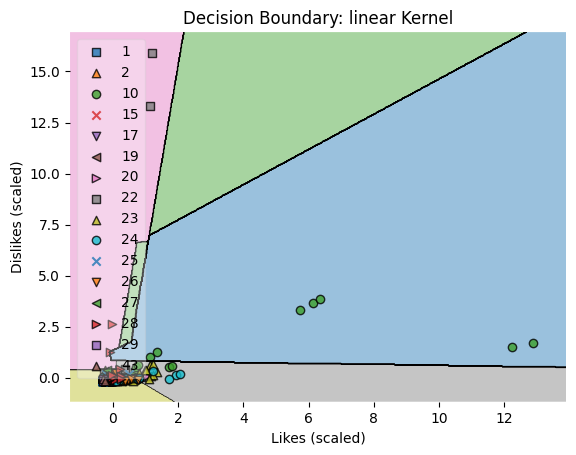

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


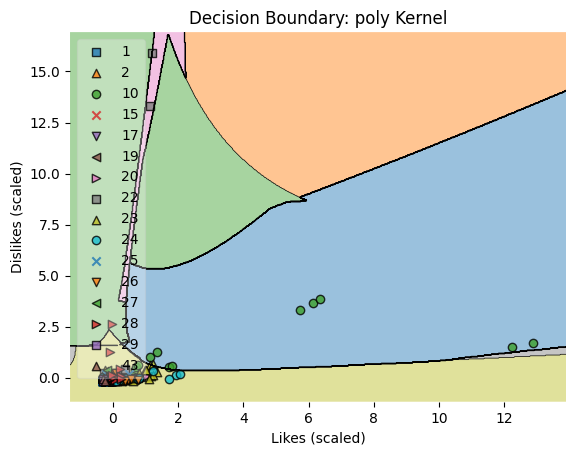

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


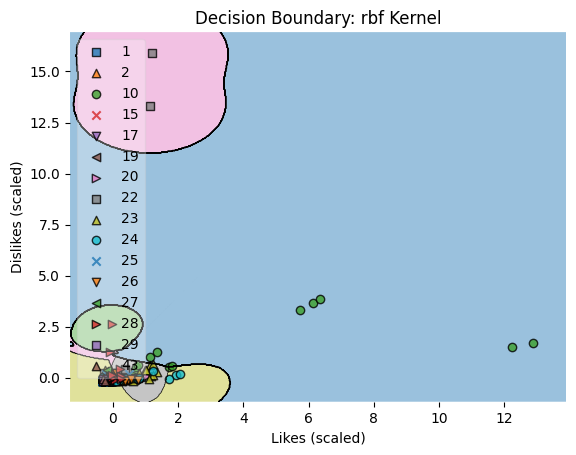

In [ ]:
from mlxtend.plotting import plot_decision_regions

metrics = []
for kernel, model in models.items():
    y_pred = model.predict(X_test)
    metrics.append({
        'Kernel': kernel,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, average='weighted', zero_division=0),
    })

results_df = pd.DataFrame(metrics)
print("Kernel Performance Comparison:")
print(results_df)

X_simple = df[['likes', 'dislikes']].iloc[:500].fillna(0).values  
y_simple = df['category_id'].iloc[:500].values
X_simple = scaler.fit_transform(X_simple)

for kernel, model in models.items():
    svc_simple = SVC(kernel=kernel, random_state=42)
    svc_simple.fit(X_simple, y_simple)
    plt.figure()
    plot_decision_regions(X_simple, y_simple, clf=svc_simple, legend=2)
    plt.title(f"Decision Boundary: {kernel} Kernel")
    plt.xlabel("Likes (scaled)")
    plt.ylabel("Dislikes (scaled)")
    plt.show()

### Task 3: Hyperparameter Tuning

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters: {'C': 10, 'gamma': 1}
Tuned Model Performance:
              precision    recall  f1-score   support

           1       0.67      0.04      0.07        52
           2       0.00      0.00      0.00         6
          10       0.43      0.30      0.35        97
          15       0.00      0.00      0.00        14
          17       1.00      0.02      0.03        61
          19       0.00      0.00      0.00        11
          20       0.40      0.05      0.09        40
          22       0.33      0.01      0.02       102
          23       0.26      0.06      0.09        88
          24       0.33      0.95      0.49       310
          25       0.00      0.00      0.00       106
          26       0.00      0.00      0.00        57
          27       0.00      0.00      0.00        29
          28       0.00      0.00      0.00        21
          29       0.00      0.00      0.00         3
          43       0.00      0.00      0.00         3

    accuracy    

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

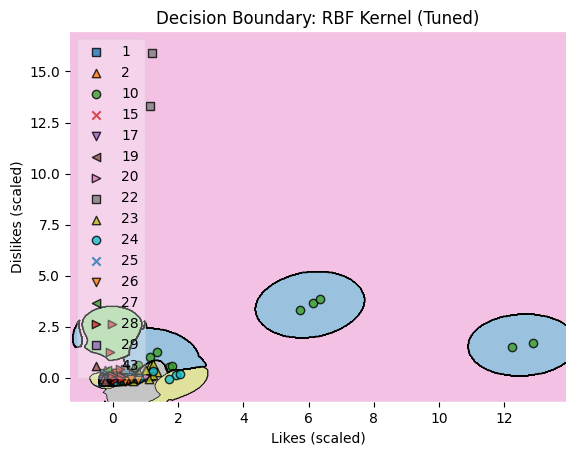

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001],
}
grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=3, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_tuned_pred = best_model.predict(X_test)
print("Tuned Model Performance:")
print(classification_report(y_test, y_tuned_pred))

best_model.fit(X_simple, y_simple)
plt.figure()
plot_decision_regions(X_simple, y_simple, clf=best_model, legend=2)
plt.title("Decision Boundary: RBF Kernel (Tuned)")
plt.xlabel("Likes (scaled)")
plt.ylabel("Dislikes (scaled)")
plt.show()

## Part 6: Backpropagation and Bias-Variance Tradeof

### Task 1: Implement Backpropagation

In [ ]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def forward(self, X):
        
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)

        
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)

        return self.output

    def backpropagate(self, X, y):
        output_error = self.output - y
        output_delta = output_error * sigmoid_derivative(self.output)
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)
        self.weights_hidden_output -= self.learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_output -= self.learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.weights_input_hidden -= self.learning_rate * np.dot(X.T, hidden_delta)
        self.bias_hidden -= self.learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            self.forward(X)
            self.backpropagate(X, y)
            if epoch % 100 == 0:
                loss = np.mean((y - self.output) ** 2)
                print(f"Epoch {epoch}, Loss: {loss}")


X = np.array([
    [10, 1, 5, 0.1],  
    [15, 2, 7, 0.2],
    [20, 3, 10, 0.15],
    [5, 1, 3, 0.05],
    [30, 4, 15, 0.3]
])
y = np.array([[1], [0], [1], [0], [1]])  
nn = NeuralNetwork(input_size=4, hidden_size=5, output_size=1, learning_rate=0.01)
nn.train(X, y, epochs=1000)

Epoch 0, Loss: 0.44907797800058047
Epoch 100, Loss: 0.37210330152435045
Epoch 200, Loss: 0.29407061583622035
Epoch 300, Loss: 0.25521750300114343
Epoch 400, Loss: 0.24278168824989121
Epoch 500, Loss: 0.23891131002286073
Epoch 600, Loss: 0.23729873624229084
Epoch 700, Loss: 0.23612448256496435
Epoch 800, Loss: 0.23482478341008753
Epoch 900, Loss: 0.23326891003938388


### Task 2: Explore the Bias-Variance Tradeof

Epoch 0, Loss: 0.22271242012878034
Epoch 100, Loss: 0.22225073012613542
Epoch 200, Loss: 0.22200050594668774
Epoch 300, Loss: 0.22185854282926062
Epoch 400, Loss: 0.22177298711592322
Epoch 500, Loss: 0.22171724980881044
Epoch 600, Loss: 0.2216775109819562
Epoch 700, Loss: 0.22164654488832822
Epoch 800, Loss: 0.22162058789360461
Epoch 900, Loss: 0.22159771422498417
Epoch 0, Loss: 0.3258609257173403
Epoch 100, Loss: 0.21635786859475123
Epoch 200, Loss: 0.20476239883567357
Epoch 300, Loss: 0.2029972830557233
Epoch 400, Loss: 0.20156830105510007
Epoch 500, Loss: 0.20018732281018517
Epoch 600, Loss: 0.19882777171764685
Epoch 700, Loss: 0.19747501828189243
Epoch 800, Loss: 0.1961197445658769
Epoch 900, Loss: 0.19475576936752828
Epoch 0, Loss: 0.24771859822691278
Epoch 100, Loss: 0.22068164623827244
Epoch 200, Loss: 0.21902672244109947
Epoch 300, Loss: 0.21841411411824674
Epoch 400, Loss: 0.21814848352929705
Epoch 500, Loss: 0.2179890898346312
Epoch 600, Loss: 0.21786288601812942
Epoch 700, L

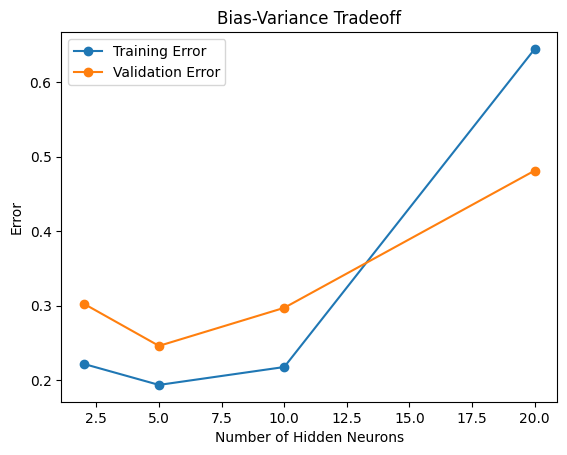

In [ ]:
X_train, X_val = X[:3], X[3:]
y_train, y_val = y[:3], y[3:]
hidden_layer_sizes = [2, 5, 10, 20]
training_errors = []
validation_errors = []

for hidden_size in hidden_layer_sizes:
    nn = NeuralNetwork(input_size=4, hidden_size=hidden_size, output_size=1, learning_rate=0.01)
    nn.train(X_train, y_train, epochs=1000)
    train_pred = nn.forward(X_train)
    val_pred = nn.forward(X_val)
    train_error = np.mean((y_train - train_pred) ** 2)
    val_error = np.mean((y_val - val_pred) ** 2)

    training_errors.append(train_error)
    validation_errors.append(val_error)
    
plt.plot(hidden_layer_sizes, training_errors, label='Training Error', marker='o')
plt.plot(hidden_layer_sizes, validation_errors, label='Validation Error', marker='o')
plt.xlabel('Number of Hidden Neurons')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()

### Task 3: Evaluate and Compare

Epoch 1/100


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step - accuracy: 0.6667 - loss: 0.6507 - val_accuracy: 0.5000 - val_loss: 0.6539
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6667 - loss: 0.6502 - val_accuracy: 0.5000 - val_loss: 0.6552
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.6667 - loss: 0.6498 - val_accuracy: 0.5000 - val_loss: 0.6564
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.6667 - loss: 0.6493 - val_accuracy: 0.5000 - val_loss: 0.6577
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6667 - loss: 0.6489 - val_accuracy: 0.5000 - val_loss: 0.6591
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6667 - loss: 0.6485 - val_accuracy: 0.5000 - val_loss: 0.6604
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6667 - loss: 0.6481 - val_accuracy: 0.5000 - val_loss: 0.6618
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6667 - loss: 0.6477 - val_accuracy: 0.5000 - val_loss: 0.6632
Epo

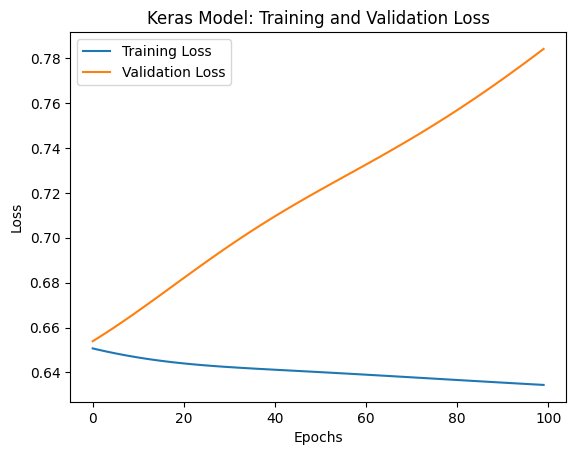

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
model = Sequential([
    Dense(5, input_dim=4, activation='sigmoid'),  
    Dense(1, activation='sigmoid')              
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=100, verbose=1, validation_split=0.33)
train_pred_keras = model.predict(X_train)
val_pred_keras = model.predict(X_val)
train_error_keras = mean_squared_error(y_train, train_pred_keras)
val_error_keras = mean_squared_error(y_val, val_pred_keras)
manual_nn = NeuralNetwork(input_size=4, hidden_size=5, output_size=1, learning_rate=0.01)
manual_nn.train(X_train, y_train, epochs=1000)
train_pred_manual = manual_nn.forward(X_train)
val_pred_manual = manual_nn.forward(X_val)
train_error_manual = np.mean((y_train - train_pred_manual) ** 2)
val_error_manual = np.mean((y_val - val_pred_manual) ** 2)
print("\n=== Training and Validation Errors ===")
print(f"Manual Model - Training Error: {train_error_manual:.4f}, Validation Error: {val_error_manual:.4f}")
print(f"Keras Model  - Training Error: {train_error_keras:.4f}, Validation Error: {val_error_keras:.4f}")
print("\n=== Comparison: Manual vs. Library-Based Models ===")
print("Manual Implementation:")
print("- Advantages: Full control over implementation, better understanding of backpropagation.")
print("- Disadvantages: Time-consuming, error-prone, not scalable for complex models.\n")
print("Library-Based Implementation (TensorFlow/Keras):")
print("- Advantages: Faster development, highly optimized, better suited for large datasets and complex architectures.")
print("- Disadvantages: Limited control over the internal processes, black-box nature of operations.")
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Keras Model: Training and Validation Loss')
plt.legend()
plt.show()